In [ ]:
###
    # This code plot the constrained sensivity of permafrost area under climate change, derived from seasonal soil temperature sensitivity
    # Calculate the mean values, RCM and RRV before and after constraint
    # These sensitivities are calculated from "../Process/04 & 05 **.py", saved in directory "../Data/Permafrost_sensitivity/" and "../Data/Ts_seasonal_sensitivity/"
    # The result of Chadburn et al.(2017) is from "../Process/07_Chadburn_sensitivity.ipynb"
###

In [1]:
import numpy as np
import pandas as pd
from statsmodels.formula.api import ols
from scipy.stats import pearsonr
from math import sqrt
import string
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

In [29]:
# The function of plot
def plot_sensitivity(obsmean, obsstd, ss, fs, model, i, j):
    # Convert input ss and fs to numpy arrays
    ss = np.array(ss, dtype=np.float64)
    fs = np.array(fs, dtype=np.float64).flatten()
    # Create DataFrame and sort
    df = pd.DataFrame({'x': ss, 'y': fs})
    df = df.sort_values('x')

    # Perform linear regression
    ols_model = ols('y ~ x', data=df).fit()
    r, p_value = pearsonr(ss, fs)
    pred = ols_model.get_prediction(df)
    pred_summary = pred.summary_frame(alpha=0.05)

    xmean = np.mean(ss)
    xstd = np.std(ss)
    zmean = np.mean(fs)
    zstd = np.std(fs)
    print('zmean = ' + str(round(zmean, 2)))
    print('zstd = ' + str(round(zstd, 2)))

    # Calculate the forecasted value with emerging constraints
    zmean_EC = zmean + r * zstd * xstd * (obsmean - xmean) / (xstd**2 + obsstd**2)
    zstd_EC = sqrt(1 - r**2 / (1 + obsstd**2 / xstd**2)) * zstd
    print('zmean_EC = ' + str(round(zmean_EC, 4)))
    print('zstd_EC = ' + str(round(zstd_EC, 4)))
    print('RCM ' +str(round(((zmean_EC-zmean)/zmean)*100,2))+'%')
    print('RRV ' +str(round((1-zstd_EC*zstd_EC/zstd/zstd)*100,2))+'%')

    tem = ["1.5°C", "2°C", "3°C"]
    row_title = ["1.6m", "2.4m", "3.2m"]
    letters = list(string.ascii_lowercase) 
    
    ax = axs[i, j]
    # Set labels for subplots
    ax.text( -0.18, 1.04,  
            f"{letters[3*i+j]}",
            transform=ax.transAxes, 
            fontproperties=FontProperties(weight='bold', size=11),
            verticalalignment='bottom',
            color='black')
    if i == 2 and j == 1:
        x_labels = ["Seasonal sensitivity of soil temperature (°C/°C)"]
        ax.set_xlabel(x_labels[0], labelpad=12, fontsize=14)
    if i == 1 and j == 0:
        y_labels = ["Sensitivity of permafrost loss to global warming (%/°C)"]
        ax.set_ylabel(y_labels[0], labelpad=43, fontsize=14)
    if i == 0:
        ax.set_title(row_title[j], fontsize=12, c='black')

    if j == 0:
        ax.text(-0.27, 0.5, tem[i], va='center', ha='right', rotation='vertical', 
                   fontsize=12, transform=ax.transAxes)

    colors = plt.cm.tab20b(np.linspace(0, 1, 18))  # Generate color list using colormap
    markers = ['o', 's', '^']
    ax.plot(df['x'].values, pred_summary['mean'].values, color='blue', linewidth=2)
    ax.fill_between(df['x'], pred_summary['mean_ci_lower'], pred_summary['mean_ci_upper'], color='blue', alpha=0.2)
    # Plot scatter plot
    h = 0
    for s, f, color, model in zip(ss, fs, colors, model):
        if h % 3 == 0:
            ax.scatter(s, f, color=color, marker=markers[0], s=19, label=model)
        elif h % 3 == 1:
            ax.scatter(s, f, color=color, marker=markers[1], s=19, label=model)
        else:
            ax.scatter(s, f, color=color, marker=markers[2], s=19, label=model)
        h = h + 1

    if j == 0:
        ax.set_ylim(-105,0)
        ax.set_xlim(0.18,0.61)
        ax.xaxis.set_minor_locator(plt.MultipleLocator(0.02))
        ax.xaxis.set_major_locator(plt.MultipleLocator(0.1))
        ax.yaxis.set_minor_locator(plt.MultipleLocator(4))
        ax.yaxis.set_major_locator(plt.MultipleLocator(20))
        ax.tick_params(axis='both', which='major', labelsize=11)
        ax.tick_params(axis='both', which='minor', length=2, color='black')
        ax.plot([np.max(ss) + 0.02, np.max(ss) + 0.02], [zmean - zstd, zmean + zstd], color='blue', linewidth=2)
        ax.scatter(np.max(ss) + 0.02, zmean, color='blue', s=30)
        ax.scatter(np.max(ss) + 0.035, zmean_EC, color='black', s=30)
        ax.plot([np.max(ss) + 0.035, np.max(ss) + 0.035], [zmean_EC - zstd_EC, zmean_EC + zstd_EC], color='black', linewidth=2)
    elif j == 1:
        ax.set_ylim(-67, -5)
        ax.set_xlim(0.13,0.44)
        ax.xaxis.set_minor_locator(plt.MultipleLocator(0.02))
        ax.xaxis.set_major_locator(plt.MultipleLocator(0.1))
        ax.yaxis.set_minor_locator(plt.FixedLocator(np.arange(-67, -5, 2)))
        ax.yaxis.set_major_locator(plt.MultipleLocator(10))
        ax.tick_params(axis='both', which='major', labelsize=11)
        ax.tick_params(axis='both', which='minor', length=2, color='black')
        ax.set_yticks(np.arange(-70, -5, 10) + 5)
        ax.set_yticklabels([str(m) for m in range(-65, 0, 10)], color='black') 
        ax.plot([np.max(ss) + 0.02, np.max(ss) + 0.02], [zmean - zstd, zmean + zstd], color='blue', linewidth=2)
        ax.scatter(np.max(ss) + 0.02, zmean, color='blue', s=30)
        ax.scatter(np.max(ss) + 0.032, zmean_EC, color='black', s=30)
        ax.plot([np.max(ss) + 0.032, np.max(ss) + 0.032], [zmean_EC - zstd_EC, zmean_EC + zstd_EC], color='black', linewidth=2)
    else:
        ax.set_ylim(-47,-5)
        ax.set_xlim(0.1,0.365)
        ax.xaxis.set_minor_locator(plt.MultipleLocator(0.02))
        ax.xaxis.set_major_locator(plt.MultipleLocator(0.1))
        ax.yaxis.set_minor_locator(plt.FixedLocator(np.arange(-47, -5, 2)))
        ax.yaxis.set_major_locator(plt.MultipleLocator(10))
        ax.tick_params(axis='both', which='major', labelsize=11)
        ax.tick_params(axis='both', which='minor', length=2, color='black')
        ax.set_yticks(np.arange(-50, -5, 10) + 5)
        ax.set_yticklabels([str(m) for m in range(-45, 0, 10)], color='black') 
        ax.plot([np.max(ss) + 0.014, np.max(ss) + 0.014], [zmean - zstd, zmean + zstd], color='blue', linewidth=2)
        ax.scatter(np.max(ss) + 0.014, zmean, color='blue', s=30)
        ax.scatter(np.max(ss) + 0.024, zmean_EC, color='black', s=30)
        ax.plot([np.max(ss) + 0.024, np.max(ss) + 0.024], [zmean_EC - zstd_EC, zmean_EC + zstd_EC], color='black', linewidth=2)
    ylim = ax.get_ylim()
    ax.plot([obsmean, obsmean], [ylim[0], ylim[0] + 0.94 * (ylim[1] - ylim[0])], color='black', linewidth=1.5, linestyle='--')
    ax.text(obsmean, ylim[0] + 0.97 * (ylim[1] - ylim[0]), "obs", ha='center', va='center', fontsize=10)
    ax.fill_betweenx([ylim[0], ylim[0] + 0.94 * (ylim[1] - ylim[0])], obsmean - obsstd, obsmean + obsstd, color='gray', alpha=0.3)        
    ax.set_ylim(ylim[0], ylim[1])  # Set y-axis range from 0 to 12
    if i == 0 and j == 2:
        ### Chadburn results  #1.5℃
        Chad_mean = -25.659536  # Transient warming to 1.5°C
        ax.scatter(np.max(ss) + 0.038, Chad_mean, color='red', s=30)
    elif i == 1 and j == 2:
        # 2℃
        Chad_mean = -25.311016
        ax.scatter(np.max(ss) + 0.038, Chad_mean, color='red', s=30)
    elif i == 2 and j == 2:
        # 3℃
        Chad_mean = -24.606562
        ax.scatter(np.max(ss) + 0.038, Chad_mean, color='red', s=30)

    if i == 2 and j == 1:
        # Set legend
        ax.legend(loc='upper center', bbox_to_anchor=(0.3, -0.31), edgecolor='lightgrey', shadow=False, ncol=6)
    if p_value < 0.001:
        significance = '***'
    elif p_value < 0.01:
        significance = '**'
    else:
        significance = ''  # Do not display asterisks when the result is not statistically significant

    # Add correlation coefficient and statistical significance to the plot
    ax.text(0.04, 0.1,f"$R = {r:.2f}${significance}", ha='left', va='center', transform=ax.transAxes, fontsize=10)
    ax.grid(True, linestyle='--', linewidth=1, alpha=0.2)
    return fig

160cm
zmean = -40.65
zstd = 21.37
zmean_EC = -49.6585
zstd_EC = 13.6283
RCM 22.15%
RRV 59.31%
zmean = -37.51
zstd = 15.32
zmean_EC = -44.0095
zstd_EC = 9.6885
RCM 17.32%
RRV 60.02%
zmean = -30.65
zstd = 6.86
zmean_EC = -33.2785
zstd_EC = 4.8949
RCM 8.58%
RRV 49.09%
240cm
zmean = -26.75
zstd = 8.73
zmean_EC = -31.6991
zstd_EC = 5.8355
RCM 18.48%
RRV 55.3%
zmean = -27.7
zstd = 10.24
zmean_EC = -33.6937
zstd_EC = 6.565
RCM 21.62%
RRV 58.92%
zmean = -26.47
zstd = 7.1
zmean_EC = -30.3923
zstd_EC = 4.8922
RCM 14.8%
RRV 52.5%
320cm
zmean = -22.59
zstd = 7.58
zmean_EC = -24.3193
zstd_EC = 4.5695
RCM 7.66%
RRV 63.69%
zmean = -23.19
zstd = 8.62
zmean_EC = -25.1791
zstd_EC = 5.0677
RCM 8.6%
RRV 65.43%
zmean = -23.3
zstd = 7.0
zmean_EC = -24.8488
zstd_EC = 4.4342
RCM 6.65%
RRV 59.88%


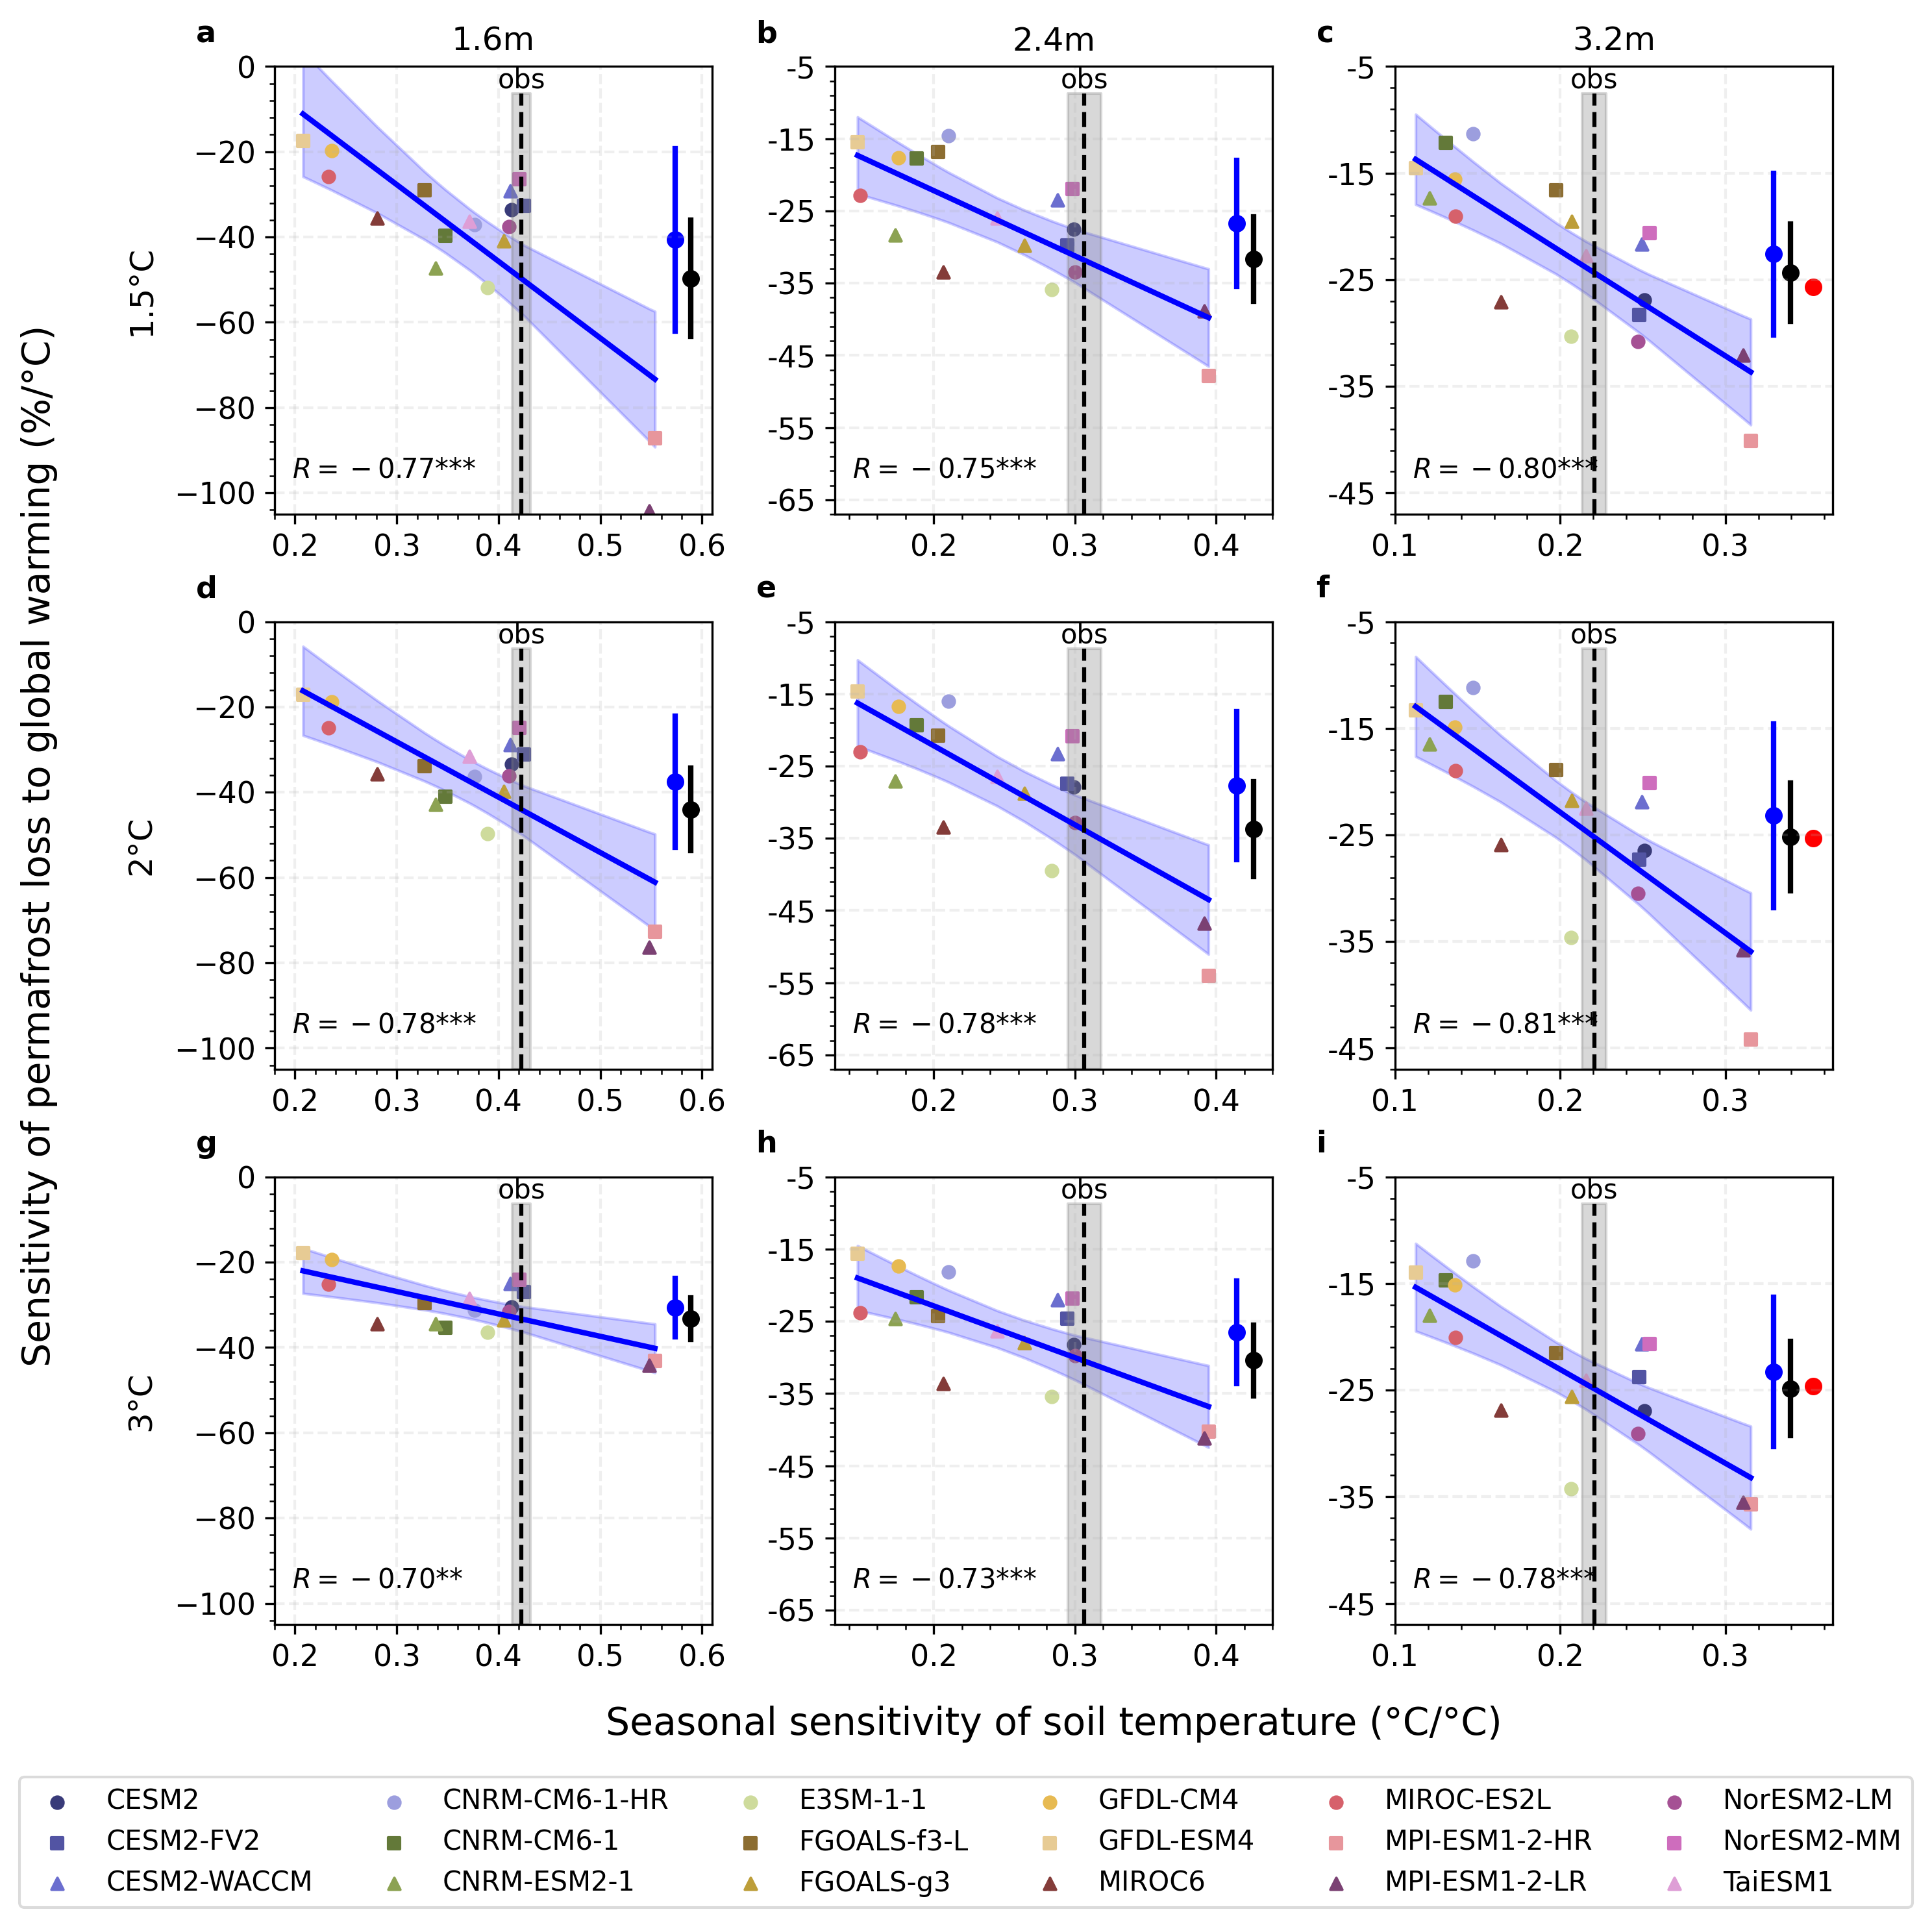

In [30]:
model_order = ["CESM2","CESM2-FV2","CESM2-WACCM","CNRM-CM6-1-HR","CNRM-CM6-1","CNRM-ESM2-1",
               "E3SM-1-1","FGOALS-f3-L","FGOALS-g3","GFDL-CM4","GFDL-ESM4","MIROC6",
               "MIROC-ES2L","MPI-ESM1-2-HR","MPI-ESM1-2-LR","NorESM2-LM","NorESM2-MM","TaiESM1"]
depths = ['160cm', '240cm', '320cm']

# Set up the plot
fig, axs = plt.subplots(3, 3, figsize=(10, 10), dpi=300)
fig.subplots_adjust(wspace=0.28, hspace=0.24)  # Adjust horizontal and vertical spacing

# Define excluded models as a set for faster lookup
excluded_models = {
    "KACE-1-0", "CanESM5", "CanESM5-CanOE", "IPSL-CM6A-LR"
    ,"CAS-ESM2-0","CMCC-CM2-SR5", "CMCC-ESM2"
}

# Function to read data from a file
def read_data_file(file_path):
    with open(file_path) as file:
        return [float(line.strip()) for line in file.readlines()]

# Process each depth
a = 0
for depth in depths:
    print(depth)
    # Read sensitivity data from CSV file
    file_path = "../Data/Permafrost_sensitivity/" + depth + "_permafrost_sensitivity_under_climate_change_ssp585.csv"
    pfarea_dt = pd.read_csv(file_path).set_index('model').loc[model_order]
    pfarea_dt3, pfarea_dt2, pfarea_dt15 = pfarea_dt['3'], pfarea_dt['2'], pfarea_dt['1.5']
    
    # Read temperature data (sorted by model order)
    Ts_path = f"../Data/Ts_seasonal_sensitivity/Ts"+depth+"_Ts02_all_station_avg_obs_18model.txt"

    Ts_dt = read_data_file(Ts_path)
    
    # Filter out excluded models
    midx = [model not in excluded_models for model in model_order]
    
    # Plot sensitivity for each depth
    for i, pfarea in enumerate([pfarea_dt15, pfarea_dt2, pfarea_dt3]):
        plot_sensitivity(Ts_dt[-2], Ts_dt[-1], 
                         Ts_dt[:-2], 
                         pfarea[midx], model_order, i, a)
    a += 1

# Adjust layout and show plot
plt.subplots_adjust(left=0.15, right=0.95,bottom=0.15, top=0.95) 
plt.show()

In [26]:
fig.savefig("../Figures/Figure3.png", bbox_inches='tight',dpi=300)